In [1]:
import os

data_path = r"D:\project1\pythonProject\Medical diagnostic assistance system"

for dirname, _, filenames in os.walk(data_path):
    for filename in filenames:
        print(os.path.join(dirname, filename))

D:\project1\pythonProject\Medical diagnostic assistance system\medical assistant.ipynb
D:\project1\pythonProject\Medical diagnostic assistance system\dataset\Diabetic Foot Tongue Image Database.xlsx


In [3]:
import numpy as np
import pandas as pd
import pickle

# ----------------------------
# 1. Data Loading and Preprocessing
# ----------------------------
data_path = r"D:\project1\pythonProject\Medical diagnostic assistance system\dataset\Diabetic Foot Tongue Image Database.xlsx"
df = pd.read_excel(data_path)

# Drop non-numeric features: remove 'Name' (name) and 'TNOAA' (identifier not used for training)
df = df.drop(columns=['Name', 'TNOAA'])

# Fill missing values with the median
df.fillna(df.median(), inplace=True)

# ----------------------------
# 2. Construct Diagnostic Labels
# ----------------------------
# Use 'Hardness at the First Metatarsophalangeal Joint' to create binary labels:
# If the value >= 5, it is considered abnormal (positive, labeled as 1); otherwise, normal (negative, labeled as 0)
df['Diagnosis'] = (df['Hardnessatthe First Metatarsophalangeal Joint'] >= 5).astype(int)

# Prepare feature data by removing the column used to create the label
X = df.drop(columns=['Diagnosis', 'Hardnessatthe First Metatarsophalangeal Joint'])
y = df['Diagnosis']

# ----------------------------
# 3. Split into Training and Testing Sets
# ----------------------------
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# ----------------------------
# 4. Build and Train the Random Forest Model
# ----------------------------
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# ----------------------------
# 5. Save the Model (only the model, no other output)
# ----------------------------
model_filename = 'rf_diagnosis_model.pkl'
with open(model_filename, 'wb') as f:
    pickle.dump(rf_model, f)
print(f"Model saved as '{model_filename}'")


Model saved as 'rf_diagnosis_model.pkl'


In [4]:
import pickle
import pandas as pd

# ----------------------------
# 1. Load the Saved Model
# ----------------------------
model_filename = 'rf_diagnosis_model.pkl'
with open(model_filename, 'rb') as f:
    rf_model = pickle.load(f)
print("Model loaded successfully!")

# ----------------------------
# 2. Simulate New Patient Input Data
# ----------------------------
# Note: The features for the new patient must exactly match those used during model training
# This does not include 'TNOAA' (identifier) or 'Hardness at the First Metatarsophalangeal Joint' used to generate labels
new_patient_data = {
    'Age': 60,
    'BMI': 24.5,
    'WHR': 0.85,
    'Gender': 1,
    'CigaretteSmoking History': 1,
    'Alcohol Consumption History': 1,
    'DiabetesDuration': 10,
    'Hypertension Duration': 5,
    'TC-a1': 2,
    'TC-R2': 2,
    'TC-G2': 2,
    'TC-L2': 2,
    'TC-a2': 2,
    'TC-L3': 2,
    'TC-R4': 2,
    'TC-B4': 2,
    'TC-b4': 2,
    'TheBigToePulp Hardness': 4,
    'Hardnessatthe Third Metatarsophalangeal Joint': 4.5,
    'Hardnessatthe Fifth Metatarsophalangeal Joint': 4,
    'ThePlantarMiddle Hardness': 4,
    'TheHeelHardness': 4,
    'FPG': 5.5,
    'P2BG': 5.0,
    'HbA1c': 6.5,
    'ALT': 30.0,
    'AST': 25,
    'ALP': 80,
    'GGTAE': 1.2,
    'TC': 180.0,
    'TG': 150.0,
    'LDLC': 100.0,
    'HDLC': 50.0,
    'Cr': 70.0,
    'UA': 300,
    'PRO': 1,
    'GLU': 5,
    'KET': 1,
    'WBC': 6,
    'WBC(109/L)': 6.0,
    'RBC(1012/L)': 5.0,
    'HGB(g/L)': 140.0,
    'NEUT(109/L)': 4.0
}

# Convert new patient data to DataFrame
new_patient_df = pd.DataFrame([new_patient_data])

# ----------------------------
# 3. Predict Diagnosis Using the Loaded Model
# ----------------------------
diagnosis_pred = rf_model.predict(new_patient_df)
diagnosis_prob = rf_model.predict_proba(new_patient_df)[:, 1]  # Probability for the positive class

# Generate diagnostic result based on prediction
if diagnosis_pred[0] == 1:
    diagnosis = "Positive: Risk/Abnormal condition detected"
else:
    diagnosis = "Negative: Normal condition"

print("\nNew Patient Diagnosis Result:")
print(diagnosis)
print("Predicted Positive Probability: {:.2f}%".format(diagnosis_prob[0] * 100))


Model loaded successfully!

New Patient Diagnosis Result:
Positive: Risk/Abnormal condition detected
Predicted Positive Probability: 54.00%


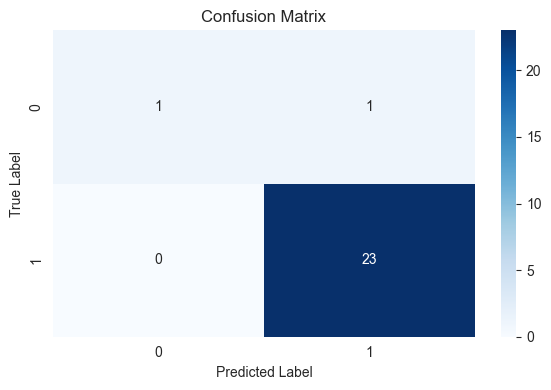

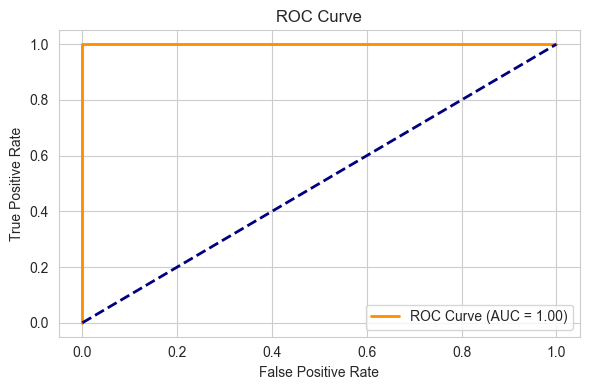

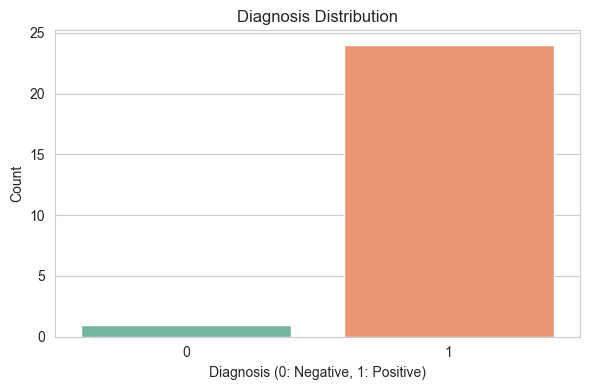

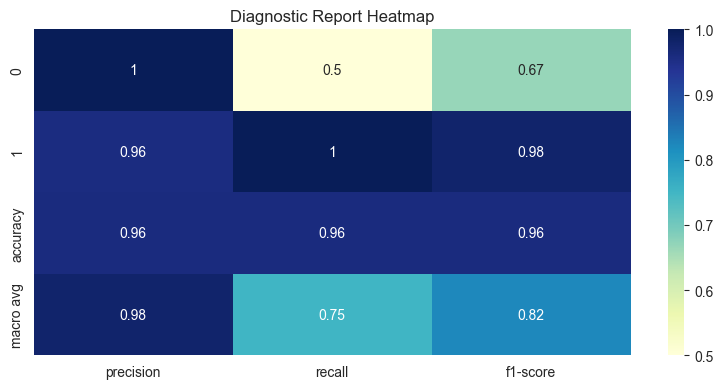

In [7]:
# Plot confusion matrix heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.savefig("confusion_matrix.png", dpi=300, bbox_inches='tight')
plt.show()

# Compute and plot ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.tight_layout()
plt.savefig("roc_curve.png", dpi=300, bbox_inches='tight')
plt.show()

# Plot distribution of diagnostic results
plt.figure(figsize=(6, 4))
sns.countplot(x="Predicted Label", hue="Predicted Label", data=results_df, palette="Set2", legend=False)
plt.xlabel("Diagnosis (0: Negative, 1: Positive)")
plt.ylabel("Count")
plt.title("Diagnosis Distribution")
plt.tight_layout()
plt.savefig("diagnosis_distribution.png", dpi=300, bbox_inches='tight')
plt.show()

# Plot heatmap for the diagnostic report (excluding accuracy row)
plt.figure(figsize=(8, 4))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap="YlGnBu")
plt.title("Diagnostic Report Heatmap")
plt.tight_layout()
plt.savefig("diagnostic_report_heatmap.png", dpi=300, bbox_inches='tight')
plt.show()
